In [1]:
from Metaheuristicas.fitness_functions import *


In [2]:
X, y = load_and_preprocess_data(filename='Resources/SeisBenchV1_v1_1.json')


In [3]:
import pandas as pd
from IPython.display import display, clear_output

# Step 1: Initialize empty DataFrames for each classifier with metrics as columns
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "AUC"]

naive_bayes_df = pd.DataFrame(columns=metrics, index=["Mutual Information", "X2", "Relief"])
random_forest_df = pd.DataFrame(columns=metrics, index=["Mutual Information", "X2", "Relief"])
neural_network_df = pd.DataFrame(columns=metrics, index=["Mutual Information", "X2", "Relief"])

# Display all tables function
def display_tables():
    clear_output(wait=True)
    print("Naive Bayes Results")
    display(naive_bayes_df)
    print("Random Forest Results")
    display(random_forest_df)
    print("Neural Network Results")
    display(neural_network_df)

In [4]:
def add_result(classifier, fitness_function, accuracy, precision, recall, f1_score, auc):
    new_data = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1_score,
        "AUC": auc
    }

    if classifier == "Naive Bayes":
        global naive_bayes_df
        naive_bayes_df.loc[fitness_function] = new_data
    elif classifier == "Random Forest":
        global random_forest_df
        random_forest_df.loc[fitness_function] = new_data
    elif classifier == "Neural Network":
        global neural_network_df
        neural_network_df.loc[fitness_function] = new_data

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
def confusion_matrix_heatmap(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

In [6]:
from Metaheuristicas.Cuckoo import cuckoo_search

n = 40
dim = 84

In [7]:
#Save the results from the optimizations
Mutual_Information = []
Chi2 = []
ReliefF = []

#### Models Naive Bayes and Decision Tree

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
DT = RandomForestClassifier()

#dataset split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Cuckoo Search with Mutual Information


In [9]:
nests, fitness_scores, best_nest, best_CKMIfitness = cuckoo_search(n, dim, 500, X, y, fitness_function=mutual_information_eval)

CKMIFeatures = X.columns[best_nest.astype(bool)].tolist()
Mutual_Information.append([CKMIFeatures, best_CKMIfitness])


Mejor fitness al final de la iteración 1: 2.2451
Mejor fitness al final de la iteración 2: 2.4105
Mejor fitness al final de la iteración 3: 2.4105
Mejor fitness al final de la iteración 4: 2.4105
Mejor fitness al final de la iteración 5: 2.4238
Mejor fitness al final de la iteración 6: 2.4238
Mejor fitness al final de la iteración 7: 2.5089
Mejor fitness al final de la iteración 8: 2.5089
Mejor fitness al final de la iteración 9: 2.5089
Mejor fitness al final de la iteración 10: 2.5103
Mejor fitness al final de la iteración 11: 2.5103
Mejor fitness al final de la iteración 12: 2.5103
Mejor fitness al final de la iteración 13: 2.5103
Mejor fitness al final de la iteración 14: 2.5103
Mejor fitness al final de la iteración 15: 2.5103
Mejor fitness al final de la iteración 16: 2.5103
Mejor fitness al final de la iteración 17: 2.5109
Mejor fitness al final de la iteración 18: 2.5109
Mejor fitness al final de la iteración 19: 2.5109
Mejor fitness al final de la iteración 20: 2.5109
Mejor fit

In [34]:
print("Features selected by MI: ", CKMIFeatures)

Features selected by MI:  ['f3_t_var', 'f5_t_kurtosis', 'f6_t_multiscaleEntropy', 'f10_t_peak2rms', 'f11_t_energy', 'f12_t_zcr', 'f13_t_PeaksAboveRMSDensity_fun', 'f14_f_peaks_pos_1', 'f15_f_90_percent_energy', 'f17_f_mean', 'f18_f_std', 'f21_f_kurtosis', 'f23_f_peak_1020_value', 'f24_f_peak_1020_pos', 'f25_f_peak_2030_value', 'f26_f_peak_2030_pos', 'f28_f_peak2rms', 'f30_f_PeaksAboveRMSDensity_fun', 'f31_f_peaks_val_2', 'f32_f_peaks_pos_2', 'f33_f_peaks_val_3', 'f34_f_peaks_pos_3', 'f35_w_f_maxval_A6', 'f36_w_f_maxval_D1', 'f37_w_f_maxval_D2', 'f38_w_f_maxval_D3', 'f39_w_f_maxval_D4', 'f40_w_f_maxval_D5', 'f41_w_f_maxval_D6', 'f44_w_f_maxpos_D3', 'f45_w_f_maxpos_D4', 'f46_w_f_maxpos_D5', 'f49_w_f_mean_D1', 'f53_w_f_mean_D5', 'f56_w_t_PEC_A6', 'f57_w_t_PEC_D1', 'f58_w_t_PEC_D2', 'f59_w_t_PEC_D3', 'f60_w_t_PEC_D4', 'f61_w_t_PEC_D5', 'f62_w_t_PEC_D6', 'f63_w_t_rms_A6', 'f64_w_t_rms_D1', 'f65_w_t_rms_D2', 'f66_w_t_rms_D3', 'f67_w_t_rms_D4', 'f69_w_t_rms_D6', 'f70_w_t_peak2peak_A6', 'f71_w

In [10]:
NB.fit(X_train[CKMIFeatures], y_train)

y_pred = NB.predict(X_test[CKMIFeatures])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))
add_result("Naive Bayes", "Mutual Information", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred))


Accuracy: 0.9477351916376306
Precision: 0.5769230769230769
Recall: 0.7894736842105263
F1: 0.6666666666666666
AUC: 0.8742144540455618


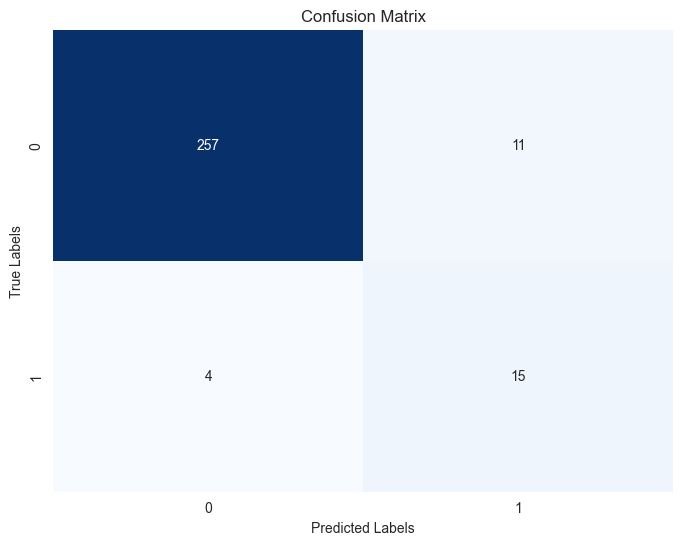

In [11]:
confusion_matrix_heatmap(y_test, y_pred)


In [12]:
DT.fit(X_train[CKMIFeatures], y_train)

y_pred = DT.predict(X_test[CKMIFeatures])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))
add_result("Random Forest", "Mutual Information", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred))

Accuracy: 0.9651567944250871
Precision: 0.7647058823529411
Recall: 0.6842105263157895
F1: 0.7222222222222222
AUC: 0.8346425765907304


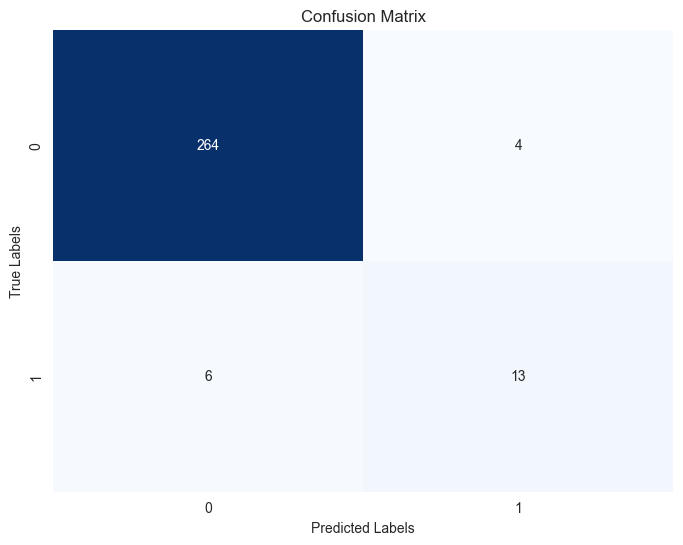

In [13]:
confusion_matrix_heatmap(y_test, y_pred)

# Cuckoo Search with Chi2

In [14]:
nests, fitness_scores, best_nest, best_CKX2fitness = cuckoo_search(n, dim, 400, X, y, fitness_function= chi2_eval)
CKX2Features = X.columns[best_nest.astype(bool)].tolist()
Chi2.append([CKX2Features, best_CKX2fitness])


Mejor fitness al final de la iteración 1: 9.4529

Mejor fitness al final de la iteración 2: 9.6259

Mejor fitness al final de la iteración 3: 10.1685
Mejor fitness al final de la iteración 4: 10.1685

Mejor fitness al final de la iteración 5: 10.1685

Mejor fitness al final de la iteración 6: 10.1685
Mejor fitness al final de la iteración 7: 10.3566

Mejor fitness al final de la iteración 8: 10.3566

Mejor fitness al final de la iteración 9: 11.0426
Mejor fitness al final de la iteración 10: 11.0426

Mejor fitness al final de la iteración 11: 11.0426

Mejor fitness al final de la iteración 12: 11.0426
Mejor fitness al final de la iteración 13: 11.0426

Mejor fitness al final de la iteración 14: 11.0426

Mejor fitness al final de la iteración 15: 11.0426
Mejor fitness al final de la iteración 16: 11.0426

Mejor fitness al final de la iteración 17: 11.5483

Mejor fitness al final de la iteración 18: 11.5483
Mejor fitness al final de la iteración 19: 11.5483

Mejor fitness al final de la 

In [35]:
print("Features selected by X2: ", CKX2Features)

Features selected by X2:  ['f1_t_mean', 'f7_t_time2peak', 'f10_t_peak2rms', 'f19_f_var', 'f20_f_energy', 'f24_f_peak_1020_pos', 'f26_f_peak_2030_pos', 'f27_f_rms', 'f30_f_PeaksAboveRMSDensity_fun', 'f32_f_peaks_pos_2', 'f34_f_peaks_pos_3', 'f37_w_f_maxval_D2', 'f38_w_f_maxval_D3', 'f42_w_f_maxpos_A6', 'f58_w_t_PEC_D2', 'f60_w_t_PEC_D4', 'f61_w_t_PEC_D5', 'f64_w_t_rms_D1', 'f65_w_t_rms_D2', 'f67_w_t_rms_D4', 'f68_w_t_rms_D5', 'f69_w_t_rms_D6', 'f72_w_t_peak2peak_D2', 'f77_w_t_peak2rms_A6']


In [15]:
NB.fit(X_train[CKX2Features], y_train)
y_pred = NB.predict(X_test[CKX2Features])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))
add_result("Naive Bayes", "X2", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred))

Accuracy: 0.9581881533101045
Precision: 0.6666666666666666
Recall: 0.7368421052631579
F1: 0.7
AUC: 0.8553613511390417


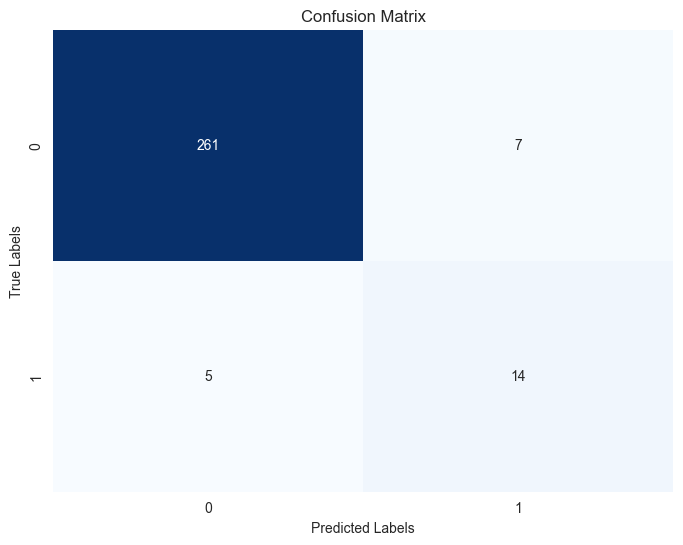

In [16]:
confusion_matrix_heatmap(y_test, y_pred)

In [17]:
DT.fit(X_train[CKX2Features], y_train)
y_pred = DT.predict(X_test[CKX2Features])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))
add_result("Random Forest", "X2", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred))

Accuracy: 0.9616724738675958
Precision: 0.7222222222222222
Recall: 0.6842105263157895
F1: 0.7027027027027027
AUC: 0.8327769049489395


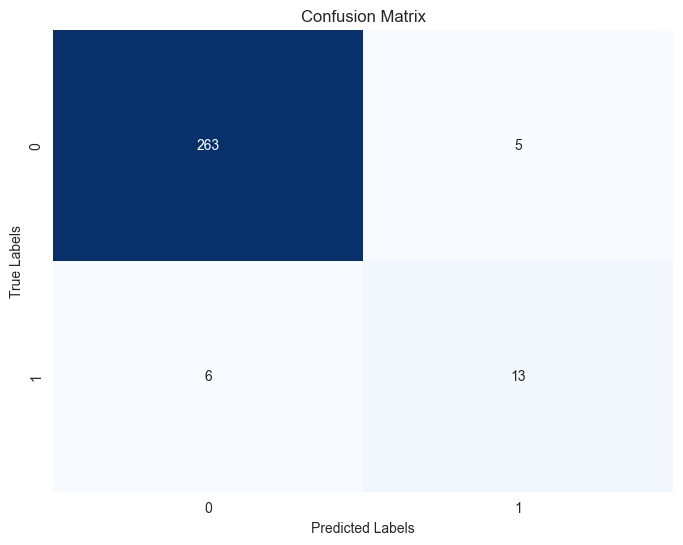

In [18]:
confusion_matrix_heatmap(y_test, y_pred)

# Cuckoo Search with ReliefF

In [19]:
nests, fitness_scores, best_nest, bestRFfitness = cuckoo_search(n, dim, 500, X, y, fitness_function= relieff_eval)
RFFeatures = X.columns[best_nest.astype(bool)].tolist()
ReliefF.append([RFFeatures, bestRFfitness])

Mejor fitness al final de la iteración 1: -0.5270
Mejor fitness al final de la iteración 2: -0.5270
Mejor fitness al final de la iteración 3: -0.5125
Mejor fitness al final de la iteración 4: -0.5125
Mejor fitness al final de la iteración 5: -0.4967
Mejor fitness al final de la iteración 6: -0.4967
Mejor fitness al final de la iteración 7: -0.4967
Mejor fitness al final de la iteración 8: -0.4967
Mejor fitness al final de la iteración 9: -0.4791
Mejor fitness al final de la iteración 10: -0.4791
Mejor fitness al final de la iteración 11: -0.4791
Mejor fitness al final de la iteración 12: -0.4791
Mejor fitness al final de la iteración 13: -0.4791
Mejor fitness al final de la iteración 14: -0.4791
Mejor fitness al final de la iteración 15: -0.4791
Mejor fitness al final de la iteración 16: -0.4791
Mejor fitness al final de la iteración 17: -0.4791
Mejor fitness al final de la iteración 18: -0.4791
Mejor fitness al final de la iteración 19: -0.4791
Mejor fitness al final de la iteración 2

In [36]:
print("Features selected by ReliefF: ", RFFeatures)

Features selected by ReliefF:  ['f4_t_entropy', 'f6_t_multiscaleEntropy', 'f7_t_time2peak', 'f10_t_peak2rms', 'f13_t_PeaksAboveRMSDensity_fun', 'f15_f_90_percent_energy', 'f19_f_var', 'f22_f_multiscaleEntropy', 'f23_f_peak_1020_value', 'f29_f_power', 'f33_f_peaks_val_3', 'f39_w_f_maxval_D4', 'f42_w_f_maxpos_A6', 'f50_w_f_mean_D2', 'f55_w_t_meanEnergyAD', 'f57_w_t_PEC_D1', 'f58_w_t_PEC_D2', 'f59_w_t_PEC_D3', 'f62_w_t_PEC_D6', 'f63_w_t_rms_A6', 'f64_w_t_rms_D1', 'f65_w_t_rms_D2', 'f67_w_t_rms_D4']


In [20]:
NB.fit(X_train[RFFeatures], y_train)
y_pred = NB.predict(X_test[RFFeatures])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))
add_result("Naive Bayes", "Relief", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred))

Accuracy: 0.9581881533101045
Precision: 0.6666666666666666
Recall: 0.7368421052631579
F1: 0.7
AUC: 0.8553613511390417


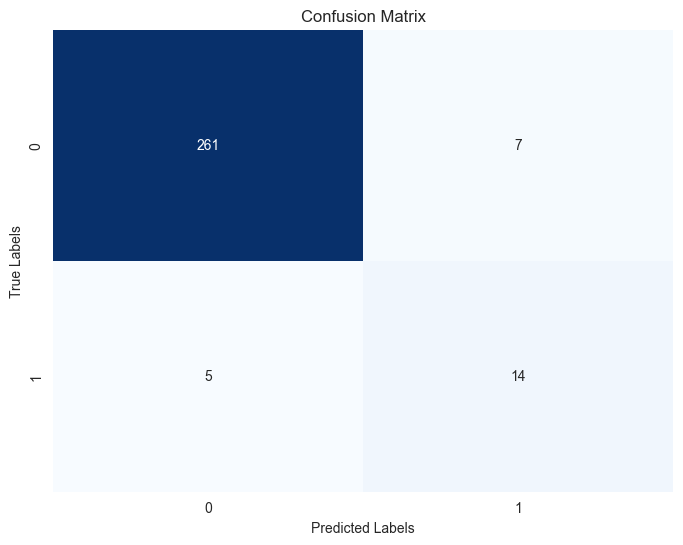

In [21]:
confusion_matrix_heatmap(y_test, y_pred)

In [22]:
DT.fit(X_train[RFFeatures], y_train)
y_pred = DT.predict(X_test[RFFeatures])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))
add_result("Random Forest", "Relief", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred))

Accuracy: 0.9686411149825784
Precision: 0.8571428571428571
Recall: 0.631578947368421
F1: 0.7272727272727273
AUC: 0.8120581304006284


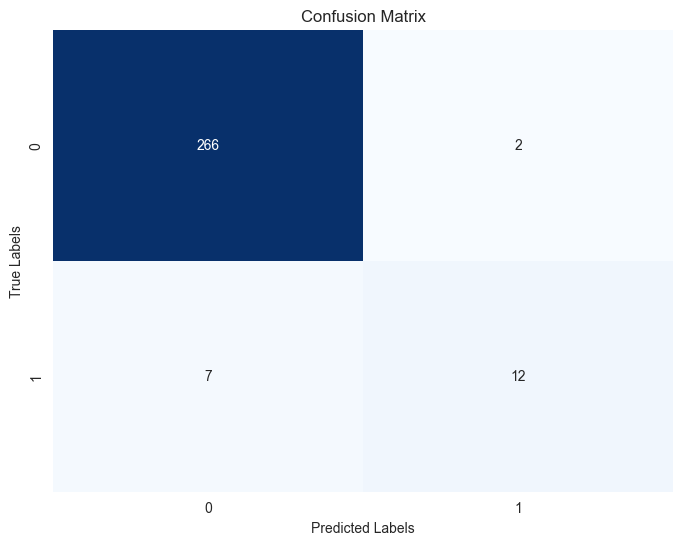

In [23]:
confusion_matrix_heatmap(y_test, y_pred)

## Red Neuronal


In [24]:
print("Features selected by MI: ", len(CKMIFeatures))
print("Features selected by X2: ", len(CKX2Features))
print("Features selected by ReliefF: ", len(RFFeatures))

Features selected by MI:  57
Features selected by X2:  24
Features selected by ReliefF:  23


In [33]:
print("Features selected by MI: ", CKMIFeatures)
print("Features selected by X2: ", CKX2Features)
print("Features selected by ReliefF: ", RFFeatures)

Features selected by MI:  ['f3_t_var', 'f5_t_kurtosis', 'f6_t_multiscaleEntropy', 'f10_t_peak2rms', 'f11_t_energy', 'f12_t_zcr', 'f13_t_PeaksAboveRMSDensity_fun', 'f14_f_peaks_pos_1', 'f15_f_90_percent_energy', 'f17_f_mean', 'f18_f_std', 'f21_f_kurtosis', 'f23_f_peak_1020_value', 'f24_f_peak_1020_pos', 'f25_f_peak_2030_value', 'f26_f_peak_2030_pos', 'f28_f_peak2rms', 'f30_f_PeaksAboveRMSDensity_fun', 'f31_f_peaks_val_2', 'f32_f_peaks_pos_2', 'f33_f_peaks_val_3', 'f34_f_peaks_pos_3', 'f35_w_f_maxval_A6', 'f36_w_f_maxval_D1', 'f37_w_f_maxval_D2', 'f38_w_f_maxval_D3', 'f39_w_f_maxval_D4', 'f40_w_f_maxval_D5', 'f41_w_f_maxval_D6', 'f44_w_f_maxpos_D3', 'f45_w_f_maxpos_D4', 'f46_w_f_maxpos_D5', 'f49_w_f_mean_D1', 'f53_w_f_mean_D5', 'f56_w_t_PEC_A6', 'f57_w_t_PEC_D1', 'f58_w_t_PEC_D2', 'f59_w_t_PEC_D3', 'f60_w_t_PEC_D4', 'f61_w_t_PEC_D5', 'f62_w_t_PEC_D6', 'f63_w_t_rms_A6', 'f64_w_t_rms_D1', 'f65_w_t_rms_D2', 'f66_w_t_rms_D3', 'f67_w_t_rms_D4', 'f69_w_t_rms_D6', 'f70_w_t_peak2peak_A6', 'f71_w

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

MUTUAL_INFORMATION 

In [26]:


# Crear y compilar el modelo
RN = Sequential()

# Definir la dimensión de entrada basada en las características seleccionadas
input_dim = X_train[CKMIFeatures].shape[1]
RN.add(Dense(units=64, activation='relu', input_dim=input_dim))
RN.add(Dense(units=32, activation='relu'))
RN.add(Dense(units=1, activation='sigmoid'))

# Compilar el modelo
RN.compile(optimizer=Adam(learning_rate=0.001), 
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])

# Entrenar el modelo
history = RN.fit(X_train[CKMIFeatures], y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = RN.evaluate(X_test[CKMIFeatures], y_test)

print(f'Test Accuracy: {accuracy}')

# Realizar predicciones en el conjunto de prueba
y_pred_prob = RN.predict(X_test[CKMIFeatures])  # Predicciones como probabilidades
y_pred = (y_pred_prob > 0.5).astype(int)  # Convertir probabilidades a etiquetas (0 o 1)

# Calcular y mostrar las métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred_prob))  # Usamos probabilidades para AUC
add_result("Neural Network", "Mutual Information", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred_prob))


Epoch 1/100


C:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8983 - loss: 0.4701 - val_accuracy: 0.9186 - val_loss: 0.2554
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9102 - loss: 0.2692 - val_accuracy: 0.9186 - val_loss: 0.2240
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8962 - loss: 0.2563 - val_accuracy: 0.9186 - val_loss: 0.1893
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8852 - loss: 0.2142 - val_accuracy: 0.9244 - val_loss: 0.1544
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9286 - loss: 0.1550 - val_accuracy: 0.9419 - val_loss: 0.1251
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9492 - loss: 0.1255 - val_accuracy: 0.9477 - val_loss: 0.1123
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9532 - loss: 0.1208 - val_accuracy: 0.9477 - val_loss: 0.1111
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9581 - loss: 0.0960 - val_accuracy: 0.9593 - val_loss: 0.0

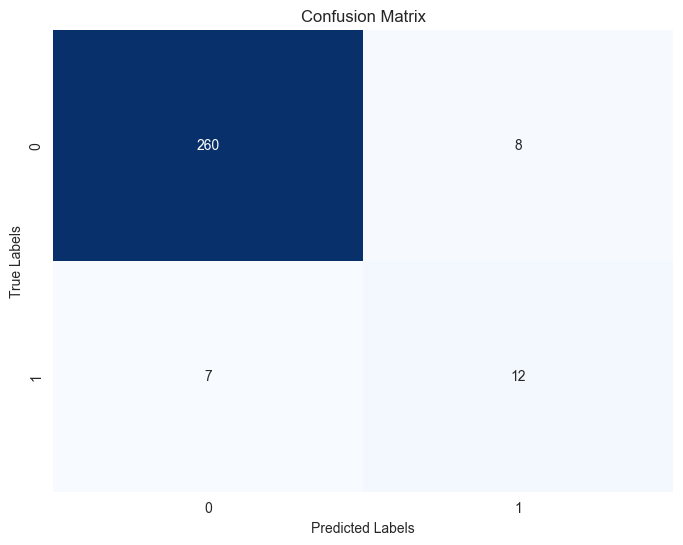

In [27]:
confusion_matrix_heatmap(y_test, y_pred)

CHI2

In [28]:

RN = Sequential()

input_dim = X_train[CKX2Features].shape[1] 
RN.add(Dense(units=64, activation='relu', input_dim=input_dim))
RN.add(Dense(units=32, activation='relu'))
RN.add(Dense(units=1, activation='sigmoid'))
RN.compile(optimizer=Adam(learning_rate=0.001), 
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])






Epoch 1/100


C:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5240 - loss: 0.6628 - val_accuracy: 0.9186 - val_loss: 0.3789
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8900 - loss: 0.3704 - val_accuracy: 0.9186 - val_loss: 0.2517
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8986 - loss: 0.2805 - val_accuracy: 0.9186 - val_loss: 0.2108
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8876 - loss: 0.2484 - val_accuracy: 0.9244 - val_loss: 0.1731
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9249 - loss: 0.1661 - val_accuracy: 0.9302 - val_loss: 0.1427
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9332 - loss: 0.1534 - val_accuracy: 0.9360 - val_loss: 0.1220
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9563 - loss: 0.1070 - val_accuracy: 0.9477 - val_loss: 0.1041
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9587 - loss: 0.1082 - val_accuracy: 0.9477 - val_loss: 0.0

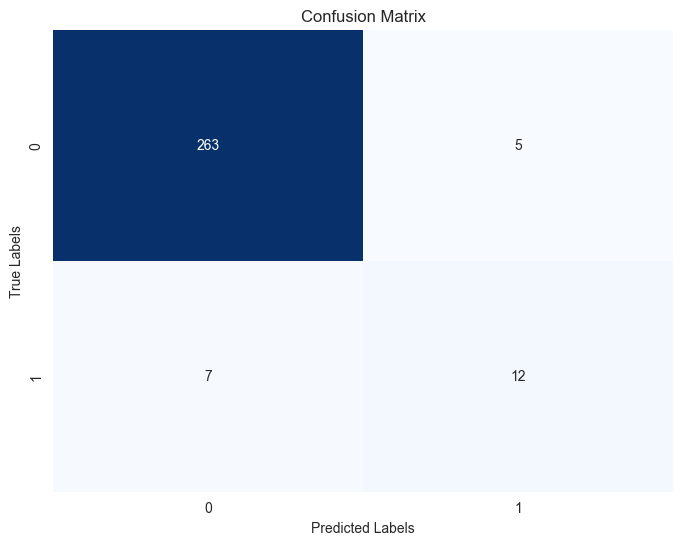

In [29]:
confusion_matrix_heatmap(y_test, y_pred)

RELIEFF

In [30]:
RN = Sequential()

input_dim = X_train[RFFeatures].shape[1] 
RN.add(Dense(units=64, activation='relu', input_dim=input_dim))
RN.add(Dense(units=32, activation='relu'))
RN.add(Dense(units=1, activation='sigmoid'))
RN.compile(optimizer=Adam(learning_rate=0.001), 
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])

history = RN.fit(X_train[RFFeatures], y_train, epochs=100, batch_size=32, validation_split=0.2)

loss, accuracy = RN.evaluate(X_test[RFFeatures], y_test)

print(f'Test Accuracy: {accuracy}')
y_pred_prob = RN.predict(X_test[RFFeatures]) 
y_pred = (y_pred_prob > 0.5).astype(int)  

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred_prob)) 
add_result("Neural Network", "Relief", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred_prob))

Epoch 1/100


C:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6777 - loss: 0.6264 - val_accuracy: 0.9186 - val_loss: 0.3731
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9100 - loss: 0.3538 - val_accuracy: 0.9186 - val_loss: 0.2681
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8877 - loss: 0.3196 - val_accuracy: 0.9186 - val_loss: 0.2382
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9120 - loss: 0.2392 - val_accuracy: 0.9186 - val_loss: 0.2202
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8977 - loss: 0.2404 - val_accuracy: 0.9186 - val_loss: 0.1981
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9077 - loss: 0.2044 - val_accuracy: 0.9244 - val_loss: 0.1785
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9109 - loss: 0.1846 - val_accuracy: 0.9302 - val_loss: 0.1595
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9295 - loss: 0.1515 - val_accuracy: 0.9360 - val_loss: 0.1

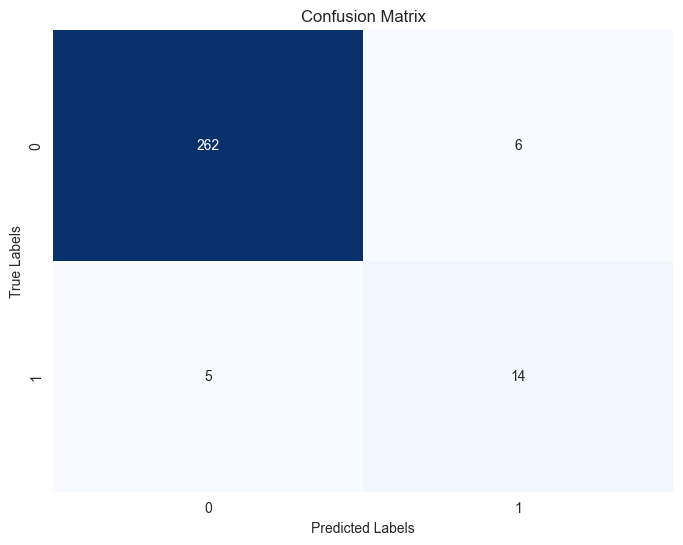

In [31]:
confusion_matrix_heatmap(y_test, y_pred)

In [32]:
display_tables()

Naive Bayes Results


,Accuracy,Precision,Recall,F1 Score,AUC
Mutual Information,0.947735,0.576923,0.789474,0.666667,0.874214
X2,0.958188,0.666667,0.736842,0.7,0.855361
Relief,0.958188,0.666667,0.736842,0.7,0.855361


Random Forest Results


,Accuracy,Precision,Recall,F1 Score,AUC
Mutual Information,0.965157,0.764706,0.684211,0.722222,0.834643
X2,0.961672,0.722222,0.684211,0.702703,0.832777
Relief,0.968641,0.857143,0.631579,0.727273,0.812058


Neural Network Results


,Accuracy,Precision,Recall,F1 Score,AUC
Mutual Information,0.947735,0.6,0.631579,0.615385,0.961901
X2,0.958188,0.705882,0.631579,0.666667,0.968578
Relief,0.961672,0.7,0.736842,0.717949,0.971917
